In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings                     # to ignore warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Sample_Superstore.csv", encoding="latin1") # "latin1" is a common encoding for files created in Windows

In [4]:
df.head()

,Row_ID,Order_ID,Product_Name,Category,Sales,Quantity,Profit,Order_Date,Customer_ID,Customer_Name,Segment,State,Region,Product ID,Discount
0,1,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,261.9600,2,41.9136,11/8/2016,CG-12520,Claire Gute,Consumer,Kentucky,South,FUR-BO-10001798,0.00
1,2,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,731.9400,3,219.5820,11/8/2016,CG-12520,Claire Gute,Consumer,Kentucky,South,FUR-CH-10000454,0.00
2,3,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,14.6200,2,6.8714,6/12/2016,DV-13045,Darrin Van Huff,Corporate,California,West,OFF-LA-10000240,0.00
3,4,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,957.5775,5,-383.0310,10/11/2015,SO-20335,Sean O'Donnell,Consumer,Florida,South,FUR-TA-10000577,0.45
4,5,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,22.3680,2,2.5164,10/11/2015,SO-20335,Sean O'Donnell,Consumer,Florida,South,OFF-ST-10000760,0.20


# Data Exploration and Cleaning

In [5]:
df.shape

(9994, 15)

In [6]:
df.Order_ID.nunique()

5009

In [7]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
df.info() # check Dtype is correct or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Product_Name   9994 non-null   object 
 3   Category       9994 non-null   object 
 4   Sales          9994 non-null   float64
 5   Quantity       9994 non-null   int64  
 6   Profit         9994 non-null   float64
 7   Order_Date     9994 non-null   object 
 8   Customer_ID    9994 non-null   object 
 9   Customer_Name  9994 non-null   object 
 10  Segment        9994 non-null   object 
 11  State          9994 non-null   object 
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Discount       9994 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])   # Convert 'Date' column to datetime

In [11]:
df.drop_duplicates(inplace=True) # duplicates 

In [12]:
df.drop(columns=['Row_ID', 'Product ID'], inplace=True) # removed unnecessary columns

In [13]:
df.head()

,Order_ID,Product_Name,Category,Sales,Quantity,Profit,Order_Date,Customer_ID,Customer_Name,Segment,State,Region,Discount
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,261.9600,2,41.9136,2016-11-08,CG-12520,Claire Gute,Consumer,Kentucky,South,0.00
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,731.9400,3,219.5820,2016-11-08,CG-12520,Claire Gute,Consumer,Kentucky,South,0.00
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,14.6200,2,6.8714,2016-06-12,DV-13045,Darrin Van Huff,Corporate,California,West,0.00
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,957.5775,5,-383.0310,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Florida,South,0.45
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,22.3680,2,2.5164,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Florida,South,0.20


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Product_Name   9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sales          9994 non-null   float64       
 4   Quantity       9994 non-null   int64         
 5   Profit         9994 non-null   float64       
 6   Order_Date     9994 non-null   datetime64[ns]
 7   Customer_ID    9994 non-null   object        
 8   Customer_Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  State          9994 non-null   object        
 11  Region         9994 non-null   object        
 12  Discount       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.1+ KB


In [15]:
df.isnull().sum()

Order_ID         0
Product_Name     0
Category         0
Sales            0
Quantity         0
Profit           0
Order_Date       0
Customer_ID      0
Customer_Name    0
Segment          0
State            0
Region           0
Discount         0
dtype: int64

In [16]:
(df == 0).sum()

Order_ID            0
Product_Name        0
Category            0
Sales               0
Quantity            0
Profit             65
Order_Date          0
Customer_ID         0
Customer_Name       0
Segment             0
State               0
Region              0
Discount         4798
dtype: int64

In [17]:
df[df['Profit'] == 0].head()

,Order_ID,Product_Name,Category,Sales,Quantity,Profit,Order_Date,Customer_ID,Customer_Name,Segment,State,Region,Discount
234,US-2017-100930,Tenex Contemporary Contur Chairmats for Low an...,Furniture,258.072,3,0.0,2017-04-07,CS-12400,Christopher Schild,Home Office,Florida,South,0.2
551,CA-2016-136406,HON 5400 Series Task Chairs for Big and Tall,Furniture,1121.568,2,0.0,2016-04-15,BD-11320,Bill Donatelli,Consumer,California,West,0.2
563,CA-2015-130736,"Alliance Big Bands Rubber Bands, 12/Pack",Office Supplies,3.960,2,0.0,2015-12-07,JF-15490,Jeremy Farry,Consumer,Washington,West,0.0
569,CA-2017-156951,Hon Every-Day Series Multi-Task Chairs,Furniture,451.152,3,0.0,2017-10-01,EB-13840,Ellis Ballard,Corporate,Washington,West,0.2
819,CA-2014-140858,Global Leather Executive Chair,Furniture,1228.465,5,0.0,2014-06-28,CA-12775,Cynthia Arntzen,Consumer,Pennsylvania,East,0.3


In [18]:
df.describe()

,Sales,Quantity,Profit,Order_Date,Discount
count,9994.000000,9994.000000,9994.000000,9994,9994.000000
mean,229.858001,3.789574,28.656896,2016-04-30 00:07:12.259355648,0.156203
min,0.444000,1.000000,-6599.978000,2014-01-03 00:00:00,0.000000
25%,17.280000,2.000000,1.728750,2015-05-23 00:00:00,0.000000
50%,54.490000,3.000000,8.666500,2016-06-26 00:00:00,0.200000
75%,209.940000,5.000000,29.364000,2017-05-14 00:00:00,0.200000
max,22638.480000,14.000000,8399.976000,2017-12-30 00:00:00,0.800000
std,623.245101,2.225110,234.260108,NaN,0.206452


In [19]:
#I see outliers in the dataset, I need to replace the zero values in the profit with the median

In [20]:
median_profit = df['Profit'].median() #calulate median value for replaceing zeros

In [21]:
median_profit

8.6665

In [22]:
df['Profit'] = df['Profit'].replace(0, 8.6665) #  zero replaced to median 

In [23]:
df.describe()

,Sales,Quantity,Profit,Order_Date,Discount
count,9994.000000,9994.000000,9994.000000,9994,9994.000000
mean,229.858001,3.789574,28.713262,2016-04-30 00:07:12.259355648,0.156203
min,0.444000,1.000000,-6599.978000,2014-01-03 00:00:00,0.000000
25%,17.280000,2.000000,1.870400,2015-05-23 00:00:00,0.000000
50%,54.490000,3.000000,8.668750,2016-06-26 00:00:00,0.200000
75%,209.940000,5.000000,29.364000,2017-05-14 00:00:00,0.200000
max,22638.480000,14.000000,8399.976000,2017-12-30 00:00:00,0.800000
std,623.245101,2.225110,234.254248,NaN,0.206452


In [24]:
(df == 0).sum()

Order_ID            0
Product_Name        0
Category            0
Sales               0
Quantity            0
Profit              0
Order_Date          0
Customer_ID         0
Customer_Name       0
Segment             0
State               0
Region              0
Discount         4798
dtype: int64

## Add some columns like Profit margin ,month,year for better analysis

In [25]:
df['Profit_Margin'] = df['Profit'] / df['Sales'] # added column as profit_margin 

In [26]:
df['Order_Month'] = df['Order_Date'].dt.strftime('%B')
df['Order_Year'] = df['Order_Date'].dt.year

In [27]:
df.head()

,Order_ID,Product_Name,Category,Sales,Quantity,Profit,Order_Date,Customer_ID,Customer_Name,Segment,State,Region,Discount,Profit_Margin,Order_Month,Order_Year
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,261.9600,2,41.9136,2016-11-08,CG-12520,Claire Gute,Consumer,Kentucky,South,0.00,0.1600,November,2016
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,731.9400,3,219.5820,2016-11-08,CG-12520,Claire Gute,Consumer,Kentucky,South,0.00,0.3000,November,2016
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,14.6200,2,6.8714,2016-06-12,DV-13045,Darrin Van Huff,Corporate,California,West,0.00,0.4700,June,2016
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,957.5775,5,-383.0310,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Florida,South,0.45,-0.4000,October,2015
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,22.3680,2,2.5164,2015-10-11,SO-20335,Sean O'Donnell,Consumer,Florida,South,0.20,0.1125,October,2015


### Final dataset

In [28]:
df.describe().round(2)

,Sales,Quantity,Profit,Order_Date,Discount,Profit_Margin,Order_Year
count,9994.00,9994.00,9994.00,9994,9994.00,9994.00,9994.00
mean,229.86,3.79,28.71,2016-04-30 00:07:12.259355648,0.16,0.12,2015.72
min,0.44,1.00,-6599.98,2014-01-03 00:00:00,0.00,-2.75,2014.00
25%,17.28,2.00,1.87,2015-05-23 00:00:00,0.00,0.08,2015.00
50%,54.49,3.00,8.67,2016-06-26 00:00:00,0.20,0.27,2016.00
75%,209.94,5.00,29.36,2017-05-14 00:00:00,0.20,0.36,2017.00
max,22638.48,14.00,8399.98,2017-12-30 00:00:00,0.80,2.19,2017.00
std,623.25,2.23,234.25,NaN,0.21,0.47,1.12


In [29]:
#The average sale is around $230, but some orders are much bigger or smaller
#Some deals lost a lot of money, maybe because of big discounts up to 80%
#Most people buy 1 to 5 items at a time. Around 25% of orders had no discount
#On average, the profit made is good, but a few orders lost a lot and need to be checked

In [30]:
# Group by Order_Year # Total sales and profit 
yearly = df.groupby('Order_Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
yearly.round(2)

,Order_Year,Sales,Profit,Quantity
0,2014,484247.50,49691.30,7581
1,2015,470532.51,61696.60,7979
2,2016,609205.60,81968.50,9837
3,2017,733215.26,93603.93,12476


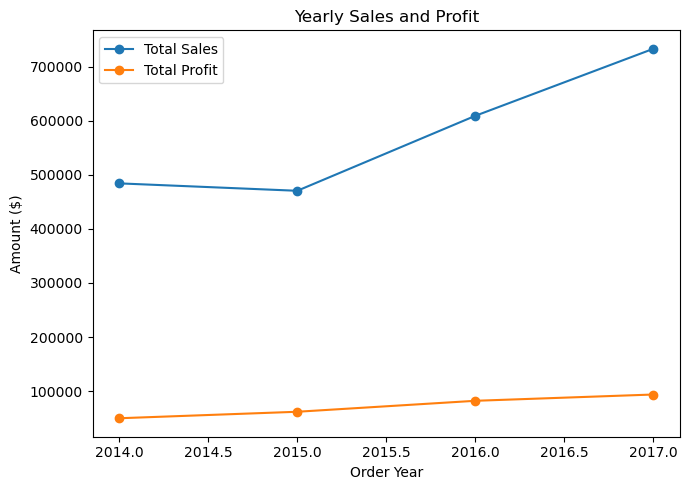

In [31]:
# Plot Yearly Sales vs Profit
plt.figure(figsize=(7, 5))
plt.plot(yearly['Order_Year'], yearly['Sales'], marker='o', label='Total Sales')
plt.plot(yearly['Order_Year'], yearly['Profit'], marker='o', label='Total Profit')
plt.title('Yearly Sales and Profit')
plt.xlabel('Order Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
#product trends
top_products = (df.groupby('Product_Name').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=False)
                .reset_index())
# Show top 5 by sales
top_products.head(5)

,Product_Name,Sales,Profit,Quantity
0,Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280,20
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7753.0390,31
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1811.0784,6
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,25.9995,39
4,GBC DocuBind TL300 Electric Binding System,19823.479,2233.5051,37


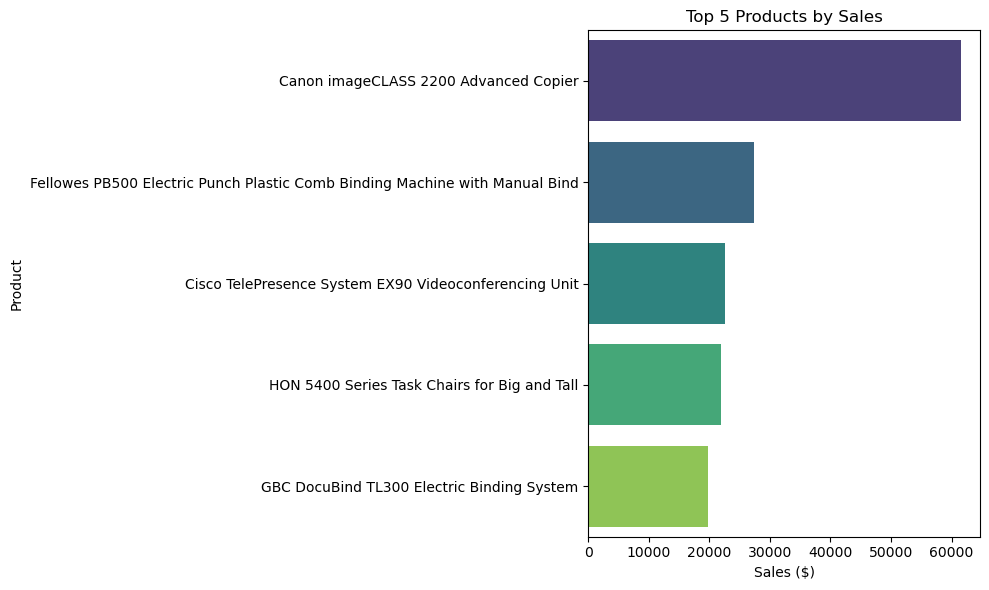

In [33]:
#Top 10 Products by Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products.head(5), x='Sales', y='Product_Name', palette='viridis')
plt.title('Top 5 Products by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [34]:
cat_summary = (df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index())
cat_summary

,Category,Sales,Profit,Quantity
0,Furniture,741999.7953,18737.2673,8028
1,Office Supplies,719047.0320,122742.1293,22906
2,Technology,836154.0330,145480.9476,6939


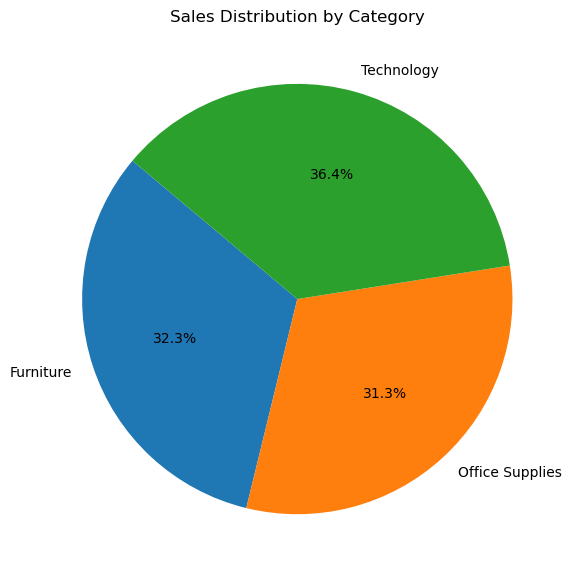

In [35]:
#Sales Share by Category
plt.figure(figsize=(6, 6))
plt.pie(cat_summary['Sales'], labels=cat_summary['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.tight_layout()
plt.show()

In [36]:
#Sales by Customer Segment
seg_summary = (df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index())
seg_summary

,Segment,Sales,Profit,Quantity
0,Consumer,1.161401e+06,134422.5367,19521
1,Corporate,7.061464e+05,92126.4645,11608
2,Home Office,4.296531e+05,60411.3430,6744


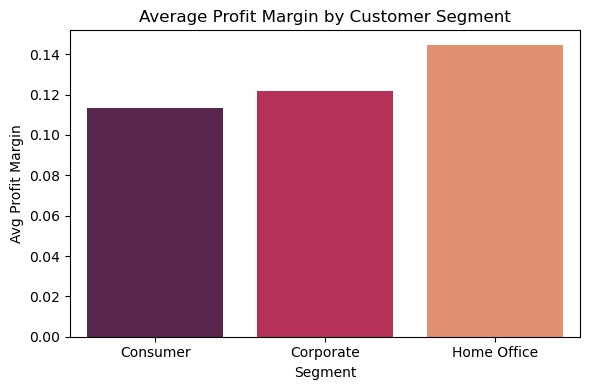

In [37]:
#Profit Margin by Segment
# Calculate average profit margin per segment
seg_margin = df.groupby('Segment')['Profit_Margin'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=seg_margin, x='Segment', y='Profit_Margin', palette='rocket')
plt.title('Average Profit Margin by Customer Segment')
plt.ylabel('Avg Profit Margin')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

In [38]:
# Group by Region and Segment, summing the Sales
sales_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

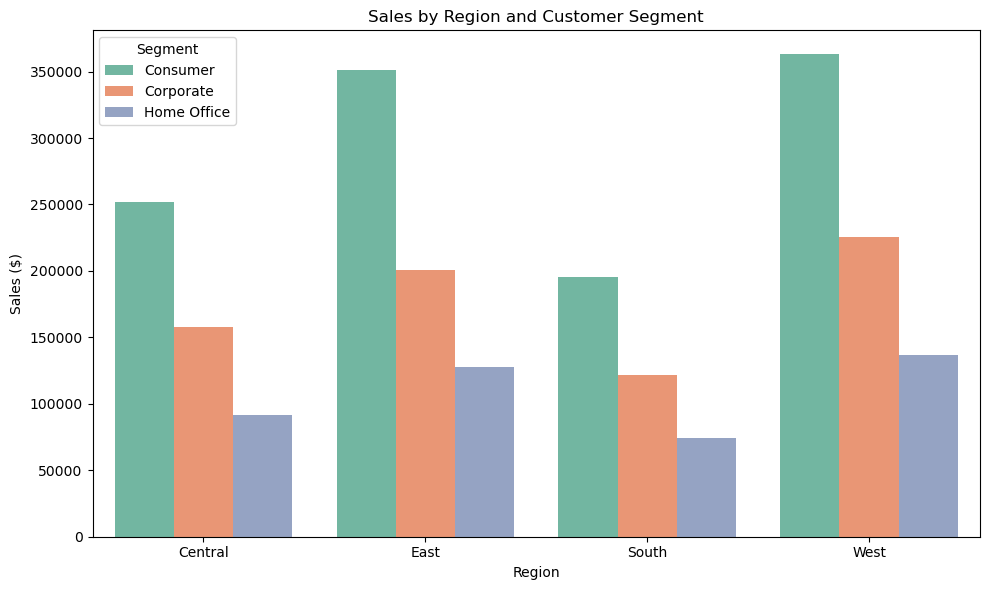

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_region_segment, x='Region', y='Sales', hue='Segment', palette='Set2')
plt.title('Sales by Region and Customer Segment')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [40]:
#Insight: West region on lead $725K in sales—top-performing region
#Recommendation: Allocate more inventory and run region-specific promotions in the West to maintain momentum
                #Launch region-specific flash sales during weekends
                #Partner with local influencers or delivery services
                #Offer free shipping or same-day delivery in those zone

In [41]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

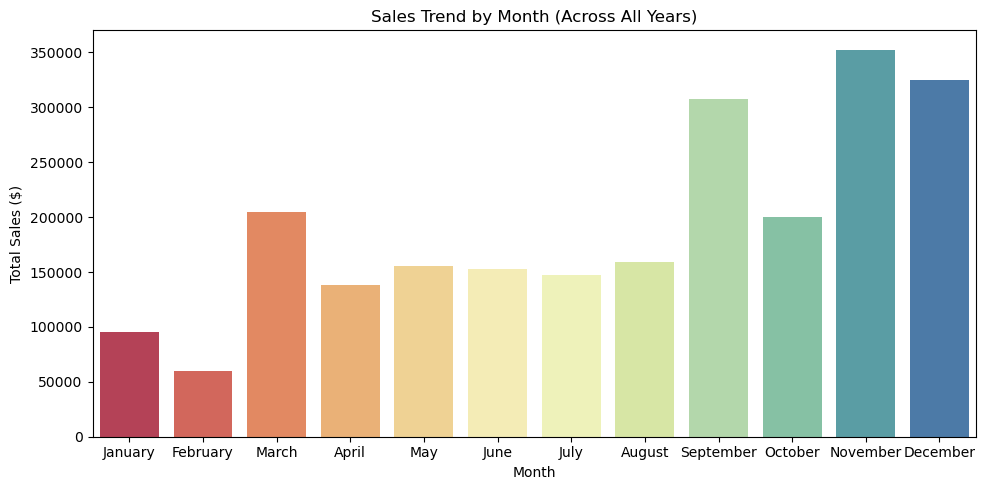

In [42]:
#Group by month and sum sales
monthly_summary = (df.groupby('Order_Month')['Sales'].sum().reindex(month_order).reset_index())
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_summary, x='Order_Month', y='Sales', palette='Spectral')
plt.title('Sales Trend by Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

In [43]:
#Seasonal or Monthly Sales Trends Observed
#Insight: Sales fluctuate month-to-month, i seems to me that it was seasonality or campaign-driven spikes
# Low Sales Months Strategy
#Recommendation: marketing and inventory planning for high-performing months
                #Offers or Clearance Month discounts.
                #Send re-engagement emails or SMS with exclusive codes valid only that month.
                #Introduce limited-time combos only available in those weak months.

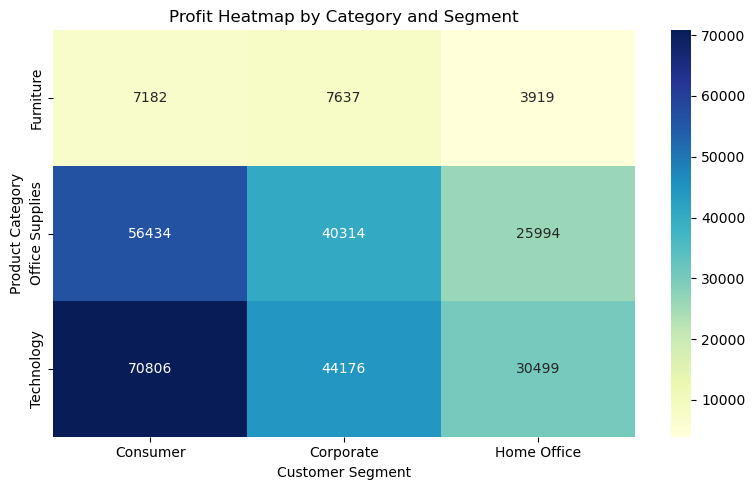

In [44]:
# Create pivot table for Profit by Category and Segment
profit_heatmap_data = df.pivot_table(index='Category', columns='Segment', values='Profit', aggfunc='sum')
plt.figure(figsize=(8, 5))
sns.heatmap(profit_heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Profit Heatmap by Category and Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [45]:
#Insight: Heatmap shows high profits in combinations like “Technology - Corporate” and “Office Supplies - Consumer.”
#Recommendation: Create bundled offers or custom deals for these profitable combinations
                 #Offer loyalty points, first-time buyer discounts, or referral 
                 #ads and emails to their needs (like space saving furniture for Home Office)
                 #Provide personalized recommendations based on customer needs 